# Machine Learning Model - Feature Engineering (Tổng hợp biến phái sinh)

In [1]:
# Ví dụ dữ liệu Nominal và Ordinal
# Trình độ học vấn
arr = ['cấp 1', 'cấp 2', 'cấp 3', 'đại học', 'sau đại học'] # => sự sắp xếp nhất định
arr1 = ['nhân viên', 'nhóm trưởng', 'trưởng phòng', 'giám đốc chi nhánh', 'giám đốc vùng'] # => thứ tự nhất định
# Ordinal
# Nominal dữ liệu chữ nhưng ko có giá trị để sắp xếp
arr2 = ['bò sát', 'có vú', 'gia cầm', 'giáp xác']

### Maintain:
1. Pre- processing cleaning (missing data processing and cleaning database) pandas
2. Feature engineering (creat new columns: age_groups.......) 
***Pre-procesisng and Feature engineering . Build the new columns)
continous -> zscore***

4. Modeling and Analytocal techniques (sampling and unsampling)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = sns.load_dataset('titanic')
display(titanic.info(), titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# titanic = titanic.drop(columns=['survived', 'pclass', 'embarked', 'who', 'adult_male', 'alone'])
# titanic

In [4]:
## Kiem tra chat luong du lieu

In [5]:
titanic.isnull().sum() # Python True = 1, False = 0

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
### Xu ly du lieu bi thieu

In [7]:
titanic['embark_town'].value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [8]:
filter1 = titanic['embark_town'].isnull() # lọc các bản ghi bị thiếu dữ liệu embark_town
titanic[filter1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [9]:
titanic['embark_town'].fillna('Unknown') # No brainer (ít quan sát bị thiếu)

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [10]:
filter1 = (titanic['who'] == 'woman') 
filter2 = (titanic['class'] == 'First')
# filter3 = (titanic['fare'] == 80)
ser = titanic[filter1 & filter2]
ser

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [11]:
ser['embark_town'].value_counts() # mặc định sẽ thể hiện giá trị lớn nhất trên cùng .index[0]

Southampton    45
Cherbourg      43
Queenstown      1
Name: embark_town, dtype: int64

In [12]:
ser['embark_town'].value_counts().idxmax()

'Southampton'

In [13]:
titanic['embark_town'] = titanic['embark_town'].fillna(ser['embark_town'].value_counts().idxmax())

In [14]:
titanic['embark_town'].value_counts(dropna=False)

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [15]:
titanic['embark_town'] = titanic['embark_town'].fillna('Unknown')

In [16]:
titanic['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [17]:
# Fillna for deck

In [18]:
titanic['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [19]:
titanic['deck'].fillna('Unknown')

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [20]:
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
titanic['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [21]:
titanic['deck'].fillna('Unknown')

0      Unknown
1            C
2      Unknown
3            C
4      Unknown
        ...   
886    Unknown
887          B
888    Unknown
889          C
890    Unknown
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [22]:
titanic['deck'] = titanic['deck'].fillna('Unknown')

In [23]:
titanic['deck'].isnull().sum()

0

In [24]:
# Special case: fillna for age:

In [25]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [26]:
titanic['age'].isnull().sum() / len(titanic['age'])

0.19865319865319866

<AxesSubplot:xlabel='age', ylabel='Count'>

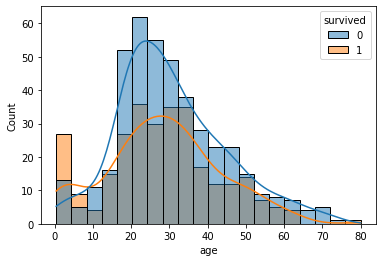

In [27]:
sns.histplot(titanic, x='age', hue='survived', kde=True)

<AxesSubplot:xlabel='age', ylabel='fare'>

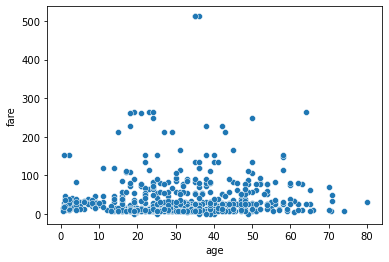

In [28]:
sns.scatterplot(data=titanic, x='age', y='fare')

In [29]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [30]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [31]:
titanic['parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot:xlabel='age', ylabel='parch'>

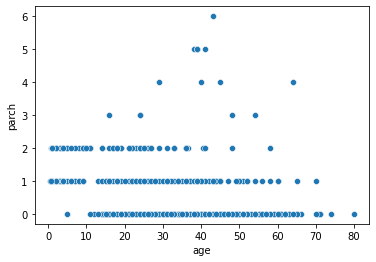

In [32]:
sns.scatterplot(data=titanic, x='age', y='parch')

<AxesSubplot:xlabel='parch', ylabel='age'>

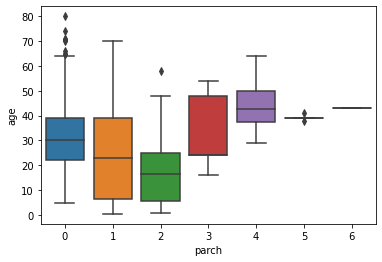

In [33]:
sns.boxplot(data=titanic, x='parch', y='age')

In [34]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg(lambda x: x.isnull().sum()/len(x))

who    sibsp  parch
child  0      0        0.000000
              1        0.000000
              2        0.000000
       1      0        0.000000
              1        0.000000
              2        0.000000
       2      1        0.000000
              2        0.000000
       3      1        0.000000
              2        0.000000
       4      1        0.000000
              2        0.000000
       5      2        0.000000
man    0      0        0.260976
              1        0.000000
              2        0.000000
       1      0        0.118644
              1        0.095238
              2        0.200000
              3        0.000000
              4        0.000000
              5        0.000000
       2      0        0.153846
              1        0.000000
       3      1        1.000000
              2        0.000000
       4      1        0.000000
       8      2        1.000000
woman  0      0        0.214876
              1        0.055556
              2     

In [35]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

len       mean  <lambda_0>
who   sibsp parch                              
child 0     0        6.0  12.166667    0.000000
            1        8.0   6.052500    0.000000
            2        9.0   4.981111    0.000000
      1     0        5.0  13.900000    0.000000
            1       15.0   4.566667    0.000000
            2        7.0   5.274286    0.000000
      2     1        5.0   2.300000    0.000000
            2        1.0   9.000000    0.000000
      3     1        3.0   4.333333    0.000000
            2        4.0   6.250000    0.000000
      4     1        8.0   5.625000    0.000000
            2        8.0   6.125000    0.000000
      5     2        4.0   8.750000    0.000000
man   0     0      410.0  32.973597    0.260976
            1       12.0  38.583333    0.000000
            2        5.0  35.800000    0.000000
      1     0       59.0  32.701923    0.118644
            1       21.0  36.000000    0.095238
            2        5.0  30.750000    0.200000
            3        1.0  16.000000    0.000000
            4        2.0  52.000000    0.000000
            5        1.0  39.000000    0.000000
      2     0       13.0  31.181818    0.153846
            1        1.0  23.000000    0.000000
      3     1        1.0        NaN    1.000000
            2        1.0  19.000000    0.000000
      4     1        1.0  16.000000    0.000000
      8     2        4.0        NaN    1.000000
woman 0     0      121.0  31.084211    0.214876
            1       18.0  34.176471    0.055556
            2       15.0  26.833333    0.200000
            3        1.0  24.000000    0.000000
            4        1.0  29.000000    0.000000
            5        2.0  40.000000    0.000000
      1     0       59.0  33.355556    0.237288
            1       21.0  35.450000    0.047619
            2        7.0  31.333333    0.142857
            3        2.0  51.000000    0.000000
            4        1.0  45.000000    0.000000
            5        2.0  38.500000    0.000000
            6        1.0  43.000000    0.000000
      2     0        3.0  35.500000    0.333333
            1        1.0  24.000000    0.000000
            2        3.0  20.000000    0.000000
            3        1.0  24.000000    0.000000
      3     0        2.0  31.500000    0.000000
            1        3.0        NaN    1.000000
            2        2.0  23.500000    0.000000
      4     2        1.0  17.000000    0.000000
      5     2        1.0  16.000000    0.000000
      8     2        3.0        NaN    1.000000

In [36]:
ser = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean())) # điền các giá trị bị thiếu bằng giá trị trung bình của nhóm
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [37]:
ser.isnull().sum()

11

In [38]:
titanic['age'] = ser

In [39]:
titanic.groupby(['sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

len       mean  <lambda_0>
sibsp parch                              
0     0      537.0  32.315390    0.000000
      1       38.0  29.647276    0.000000
      2       29.0  21.597586    0.000000
      3        1.0  24.000000    0.000000
      4        1.0  29.000000    0.000000
      5        2.0  40.000000    0.000000
1     0      123.0  32.251148    0.000000
      1       57.0  27.525439    0.000000
      2       19.0  21.579123    0.000000
      3        3.0  39.333333    0.000000
      4        3.0  49.666667    0.000000
      5        3.0  38.666667    0.000000
      6        1.0  43.000000    0.000000
2     0       16.0  31.991477    0.000000
      1        7.0   8.357143    0.000000
      2        4.0  17.250000    0.000000
      3        1.0  24.000000    0.000000
3     0        2.0  31.500000    0.000000
      1        7.0   4.333333    0.571429
      2        7.0  13.000000    0.000000
4     1        9.0   6.777778    0.000000
      2        9.0   7.333333    0.000000
5     2        5.0  10.200000    0.000000
8     2        7.0        NaN    1.000000

In [40]:
ser = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [41]:
ser.isnull().sum()

7

In [42]:
titanic['age'] = ser

In [43]:
titanic['age'].isnull().sum()

7

In [44]:
titanic[titanic['who'] == 'child']['age'].mean()

6.369518072289156

In [45]:
titanic['age'] = titanic['age'].fillna(titanic[titanic['who'] == 'child']['age'].mean())

In [46]:
titanic['age'].isnull().sum()

0

In [47]:
# Dien du lieu bi thieu bang tep sisp va parch lon nhat

In [48]:
# Tao bien bang cach chia bin du lieu

<AxesSubplot:xlabel='age', ylabel='Probability'>

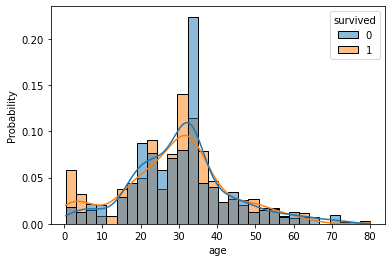

In [49]:
sns.histplot(data=titanic, x='age', hue='survived', kde=True, stat='probability', common_norm=False)

In [50]:
age_groups = [0, 15, 25, 35, 45, 60, 80, 100]
pd.cut(titanic['age'], bins=age_groups)

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [51]:
titanic['age_group'] = pd.cut(titanic['age'], bins=age_groups)
titanic['age_group']

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age_group, Length: 891, dtype: category
Categories (7, interval[int64]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [52]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,"(15, 25]"
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]"
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,"(25, 35]"
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]"
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Unknown,Southampton,no,True,"(25, 35]"
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,"(15, 25]"
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,False,Unknown,Southampton,no,False,"(25, 35]"
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,"(25, 35]"


In [53]:
# Tao bien bang bien chi bao (female & first class)

In [54]:
filter1 = titanic['sex'] == 'female'
filter2 = titanic['pclass'] < 3
(filter1 & filter2)

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Length: 891, dtype: bool

In [55]:
titanic['female_from_2nd_class'] = (filter1 & filter2)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   survived               891 non-null    int64   
 1   pclass                 891 non-null    int64   
 2   sex                    891 non-null    object  
 3   age                    891 non-null    float64 
 4   sibsp                  891 non-null    int64   
 5   parch                  891 non-null    int64   
 6   fare                   891 non-null    float64 
 7   embarked               889 non-null    object  
 8   class                  891 non-null    category
 9   who                    891 non-null    object  
 10  adult_male             891 non-null    bool    
 11  deck                   891 non-null    category
 12  embark_town            891 non-null    object  
 13  alive                  891 non-null    object  
 14  alone                  891 non-null    boo

In [56]:
# Tao bien bang tinh z-score (bien doi phan phoi)

<AxesSubplot:xlabel='fare', ylabel='Count'>

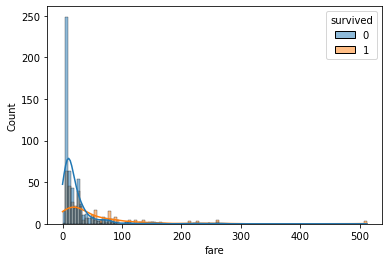

In [57]:
sns.histplot(titanic, x='fare', hue='survived', kde=True)

In [58]:
np.log(titanic['fare'])

/opt/anaconda3/envs/anthony/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: fare, Length: 891, dtype: float64

In [59]:
ser = np.log(titanic['fare'].where(titanic['fare'] > 0, 1)) # where của pandas => nhận vào 1 điều kiện, nếu ko đáp ứng đc điều kiện, nó sẽ nhận giá trị mà mình quy định
ser

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='fare', ylabel='Count'>

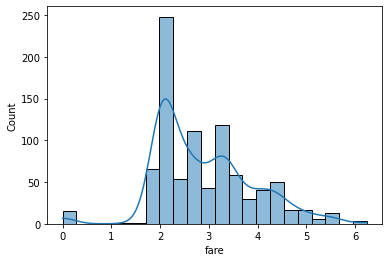

In [60]:
sns.histplot(ser, kde=True)

In [61]:
# Tính z-score
ser.mean(), ser.std()

(2.8938462379200263, 1.0028989322884634)

In [62]:
new_ser = (ser - ser.mean())/ser.std()
new_ser

0     -0.910206
1      1.368848
2     -0.821443
3      1.075214
4     -0.805838
         ...   
886   -0.327946
887    0.505885
888    0.260270
889    0.505885
890   -0.843708
Name: fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='fare', ylabel='Count'>

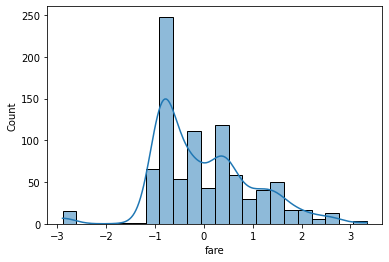

In [63]:
sns.histplot(new_ser, kde=True)

In [64]:
new_ser.mean(), new_ser.std()

(-6.97783270247012e-17, 1.0)

In [21]:
## Data Sampling
length_data = len(titanic)
sample_size = int(0.8*length_data)
print(sample_size)

712


In [22]:
sample_data = titanic.sample(sample_size)
sample_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
131,0,3,male,20.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
780,1,3,female,13.0,0,0,7.2292,C,Third,child,False,NaN,Cherbourg,yes,True
275,1,1,female,63.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
544,0,1,male,50.0,1,0,106.4250,C,First,man,True,C,Cherbourg,no,False
706,1,2,female,45.0,0,0,13.5000,S,Second,woman,False,NaN,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
70,0,2,male,32.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
810,0,3,male,26.0,0,0,7.8875,S,Third,man,True,NaN,Southampton,no,True
224,1,1,male,38.0,1,0,90.0000,S,First,man,True,C,Southampton,yes,False


In [23]:
unsample_data = titanic[~titanic.index.isin(sample_data.index)]
unsample_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


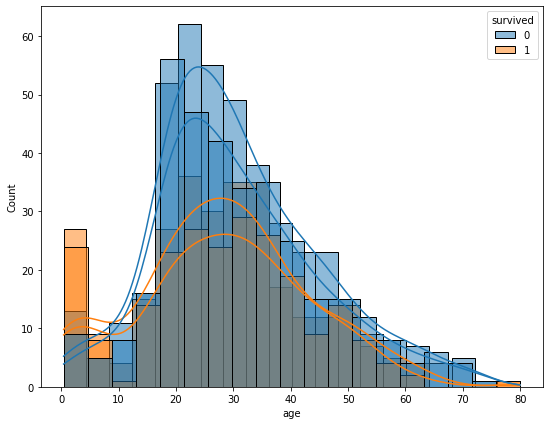

In [55]:
# Tinh ti le survived
plt.figure(figsize = (9,7))
ax = sns.histplot(data=titanic, x='age', kde=True, hue='survived', common_norm=False)
sns.histplot(data=sample_data, x='age', kde=True, hue='survived', common_norm=False, ax=ax)

In [65]:
# Sampling bang scikit learn

In [66]:
from sklearn.model_selection import train_test_split
sample_data, _ = train_test_split(titanic, train_size=0.8, stratify=titanic['survived'], random_state=42)

In [67]:
# Using train test lit to separate data frame basing on % which defined before

In [68]:
sample_set, unsample_set = train_test_split(titanic, train_size=0.8)

In [69]:
sample_set.shape

(712, 17)

In [70]:
unsample_set.shape

(179, 17)

In [71]:
sample_set, unsample_set =train_test_split(titanic, train_size=0.8, random_state=42, stratify = titanic['survived'])

In [72]:
sample_set.shape

(712, 17)

In [73]:
unsample_set.shape

(179, 17)

<AxesSubplot:xlabel='age', ylabel='Probability'>

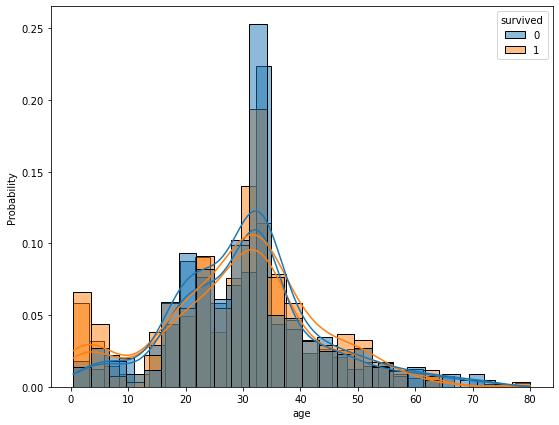

In [74]:
# Tinh ti le survived
plt.figure(figsize= (9,7))
ax = sns.histplot(data=titanic, x='age', kde=True, hue='survived', common_norm=False, stat = 'probability')
sns.histplot(data=sample_data, x='age', kde=True, hue='survived', common_norm=False, ax=ax, stat = 'probability')

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
ser = scaler.fit_transform(titanic[['fare']])
titanic['fare_std'] = ser

<AxesSubplot:xlabel='fare_std', ylabel='Count'>

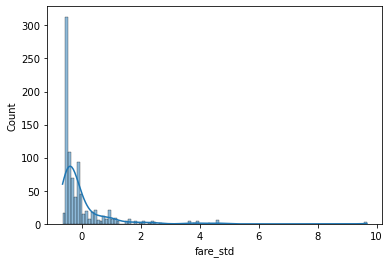

In [76]:
sns.histplot(data = titanic, x = 'fare_std', kde = True)

In [79]:
scaler =RobustScaler()
ser = scaler.fit_transform(titanic[['fare']])
titanic['fare_robust'] = ser

<AxesSubplot:xlabel='fare_robust', ylabel='Count'>

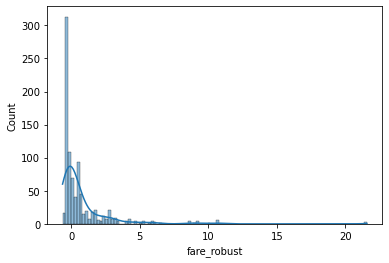

In [80]:
sns.histplot(data = titanic, x = 'fare_robust', kde = True)

<AxesSubplot:xlabel='fare_minmax', ylabel='Count'>

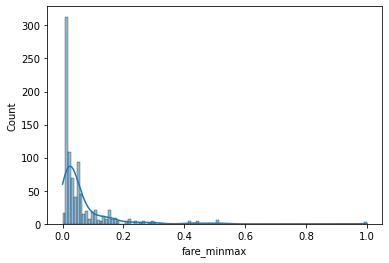

In [81]:
scaler =MinMaxScaler()
ser = scaler.fit_transform(titanic[['fare']])
titanic['fare_minmax'] = ser
sns.histplot(data = titanic, x = 'fare_minmax', kde = True)

<AxesSubplot:xlabel='age', ylabel='survived'>

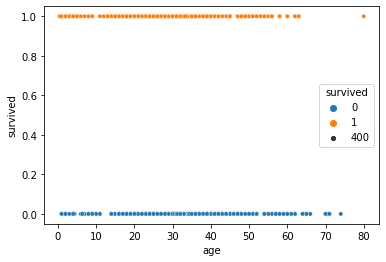

In [82]:
sns.scatterplot(data = titanic, x = 'age', y = 'survived', hue = 'survived', size= 400)